In [1]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter('always')
import importlib

from scripts.a_data_loading_cleaning import run_load_clean_diagnose_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Loading & Cleaning

In [2]:
csv_path = f"results/scenarios_results_temp.csv"
df = run_load_clean_diagnose_data(csv_path)

✅ Total generated tokens value is constant: 16384
Original distribution:
total_generated_tokens
16384    17
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Round 1: Verfifying FLOPs on raw df
NB: FLOPs values are NOT constant: [52638582308864 20248623316992]
Original distribution:
flops
20248623316992     7
52638582308864    10
Name: count, dtype: int64

Dominant FLOPs value: 52638582308864
- Affected rows count: 7
- Affected row indices: [1, 2, 3, 4, 6, 7, 10]
- Affected configs: ['R6_Medium_Scale_Language_Model_Serving', 'R7_anti_platonic_ideal', 'R4_High_Load_Cloud_API_Deployment', 'A4_Parallel_Exploit', 'A1_Single_GPU', 'R1_Standard_Production_Config', 'R2_Low_Latency_Chatbot_Deployment']
----------------------------------------------------------------------------------------------------
FLOP Differentiators:
Round 2: Verfifying FLOPs on corrected df
NB: FLOPs values are NOT constant: [1.69499710e+13 5.2

/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:611: UserWarning: NB: FLOPs values are NOT constant: [52638582308864 20248623316992]
  if not verify_flops(df):
/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:621: UserWarning: NB: FLOPs values are NOT constant: [1.69499710e+13 5.26385823e+13]
  verify_flops(df)


# Basic understanding on contents

In [3]:
print(f"number of observation: {len(df)}")
print(f"number of scenarios: {len(df['config_name'].unique())}")
print(f"distribution of scenarios:{df['config_name'].value_counts()}")

number of observation: 17
number of scenarios: 11
distribution of scenarios:config_name
R6_Medium_Scale_Language_Model_Serving    2
R7_anti_platonic_ideal                    2
R4_High_Load_Cloud_API_Deployment         2
A3_Quantisation_Focus                     2
A1_Single_GPU                             2
R3_Balanced_Enterprise_Service            2
R5_Real_Time_Mobile_Inference             1
A4_Parallel_Exploit                       1
R1_Standard_Production_Config             1
A2_2_GPU                                  1
R2_Low_Latency_Chatbot_Deployment         1
Name: count, dtype: int64


In [4]:
cols_to_describe = [
    'total_energy_kwh',
    'total_inference_time_sec',
    'average_latency_ms_per_batch',
    'throughput_queries_per_sec',
    'throughput_tokens_per_sec',
    'cpu_energy_total',
    'gpu_energy_total',
    'flops_per_token',
    'energy_per_token_kwh',
    'divergence_energy_flops'
]

df[cols_to_describe].describe()

,total_energy_kwh,total_inference_time_sec,average_latency_ms_per_batch,throughput_queries_per_sec,throughput_tokens_per_sec,cpu_energy_total,gpu_energy_total,flops_per_token,energy_per_token_kwh,divergence_energy_flops
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01,1.700000e+01,1.700000e+01
mean,0.044779,149.878720,4133.901577,9.321349,1193.132694,0.011157,0.033563,1.803342e+09,2.733122e-06,1.632093e-15
std,0.088442,246.355779,1649.375669,11.202755,1433.952651,0.019030,0.070225,1.072994e+09,5.398077e-06,2.917798e-15
min,0.000516,3.227350,2156.165005,0.143227,18.333072,0.000151,0.000337,1.034544e+09,3.150774e-08,2.054612e-17
25%,0.001813,8.909156,2954.065163,1.029727,131.805079,0.000412,0.000972,1.034544e+09,1.106392e-07,7.513927e-17
50%,0.003955,42.446028,3794.131217,3.015594,385.996073,0.001300,0.003234,1.034544e+09,2.414077e-07,1.344385e-16
75%,0.041434,124.304770,4454.577779,14.367243,1839.007063,0.010335,0.032929,3.212804e+09,2.528939e-06,2.173739e-15
max,0.335505,893.685474,7769.048115,39.661018,5076.610253,0.067423,0.267717,3.212804e+09,2.047757e-05,1.097366e-14


📊 Plotting histogram...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


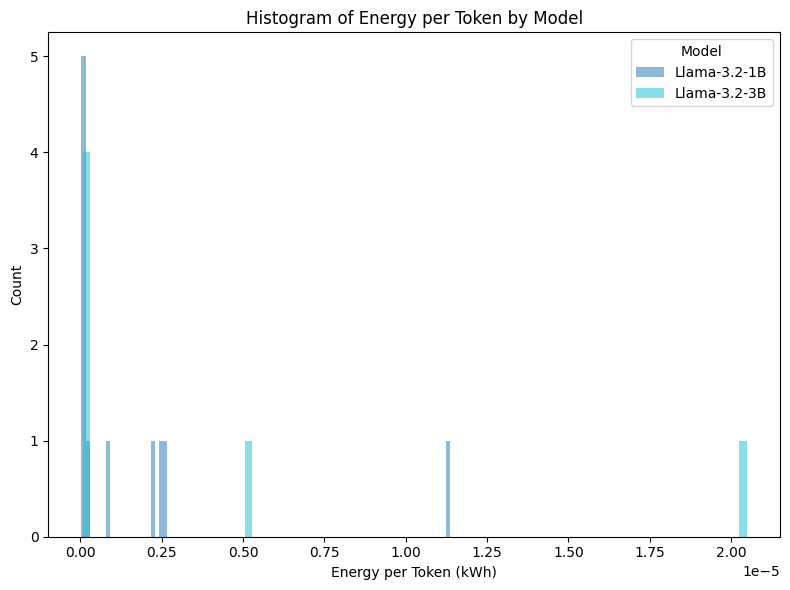

📦 Plotting boxplot...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))
/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, vert=False, patch_artist=True, labels=models)
/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:51: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  box = ax.boxplot(data, vert=False, patch_artist=True, labels=models)


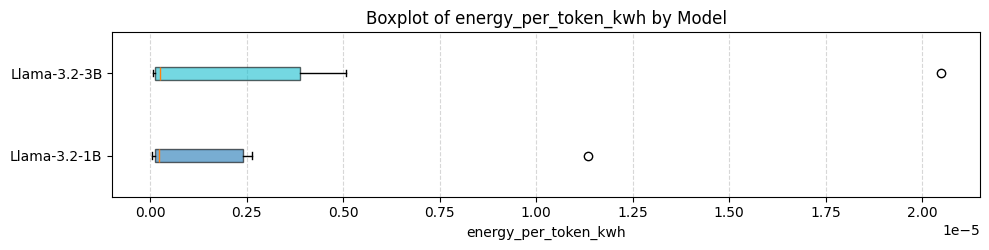

🔬 Scatter: by model...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


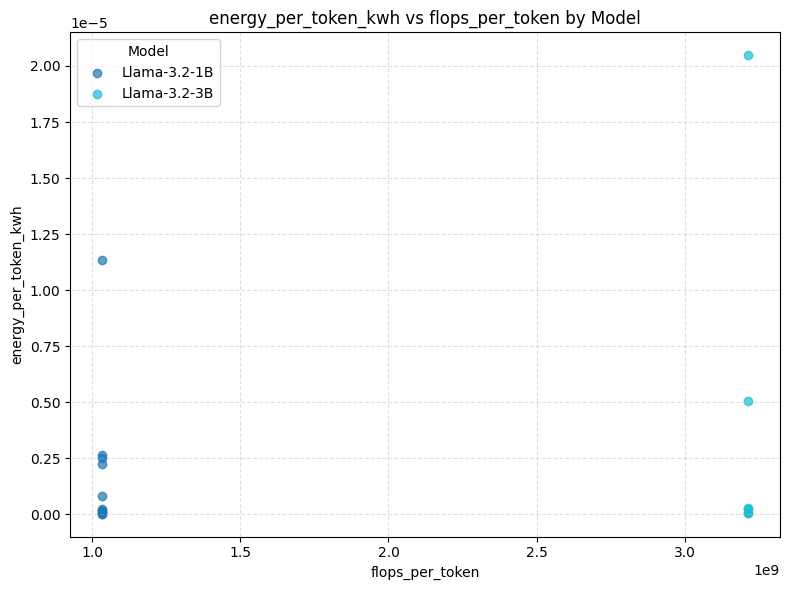

🔗 Correlation matrix...


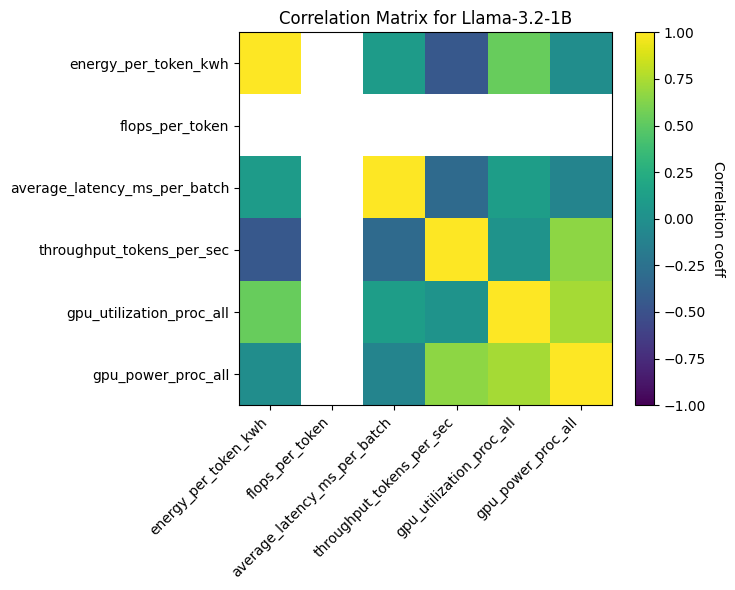

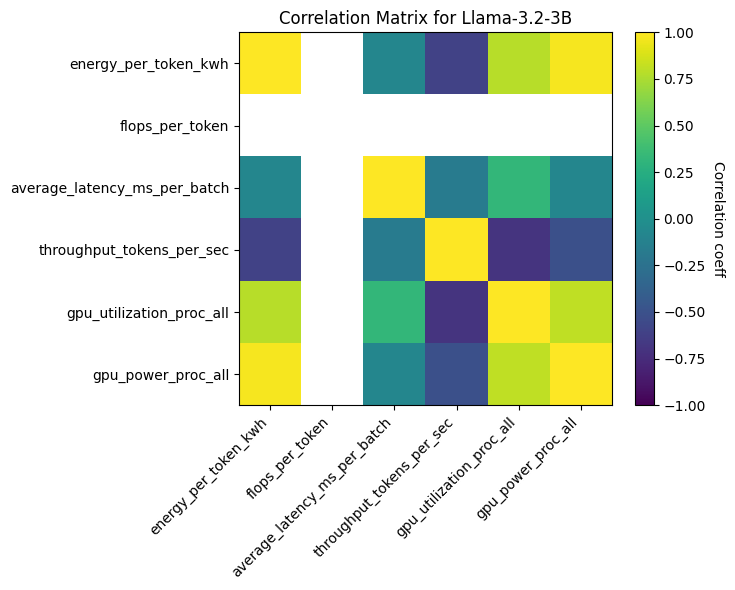

🔬 Scatter: Throughput vs energy...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


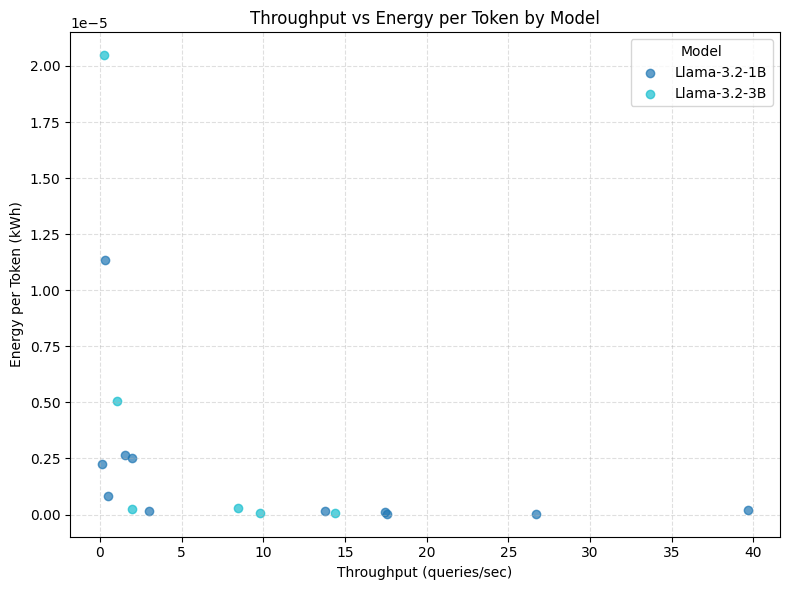

📈 Scatter: Divergence patterns...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


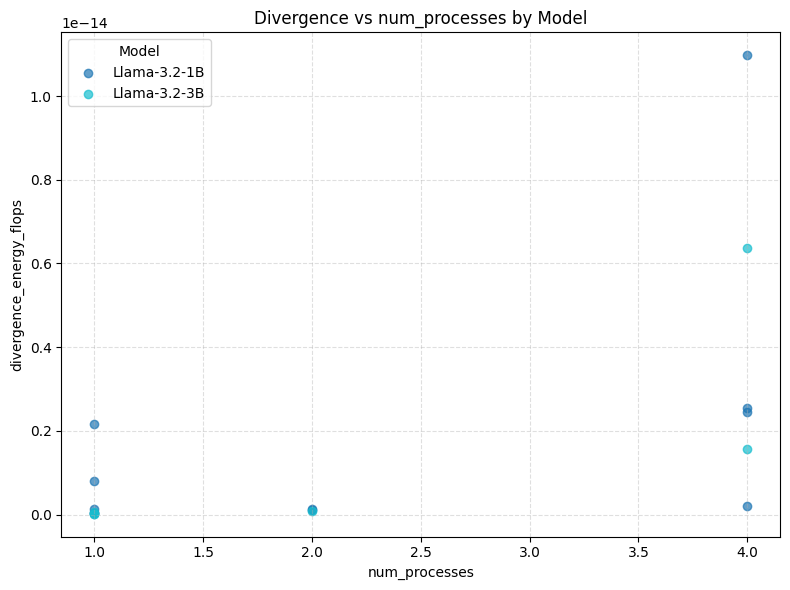

/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


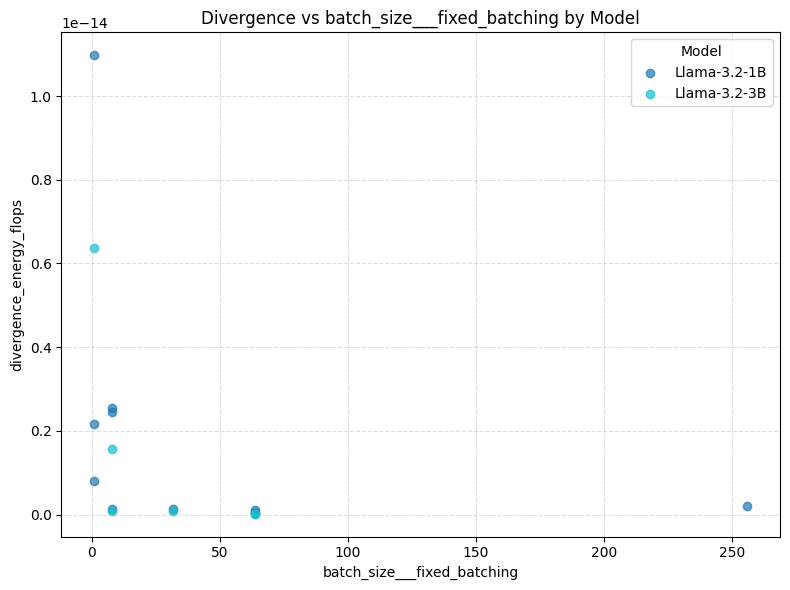

Skipping non-numeric column 'decoder_config_decoding_mode'


In [5]:
import scripts.b_exploratory_data_analysis as eda
importlib.reload(eda)

eda.plot_all_diagnostics(df)

To do:
- [X] get the outliers
- [ ] unpack the divergence plot more
- [ ] work on the correlation matrix

# Basic stats

In [6]:
from scripts.f_scenario_analysis import get_descriptive_stats
get_descriptive_stats(df)


Models: ['Llama-3.2-1B', 'Llama-3.2-3B']

--- Llama-3.2-1B (raw data) ---
Max mean energy: 0.0000 kWh @ R7_anti_platonic_ideal
Min mean energy: 0.0000 kWh @ A1_Single_GPU
- Energy reduction (worst→best): 99.72%
- Range vs. mean of means: 614.39%
- Range vs. min baseline: 35931.59%

Normalized to min baseline:
                           config_name  norm_to_min  diff_to_min_pct
                         A1_Single_GPU     1.000000         0.000000
                              A2_2_GPU     3.511494         2.511494
                 A3_Quantisation_Focus     1.094988         0.094988
                   A4_Parallel_Exploit     7.066141         6.066141
         R1_Standard_Production_Config    80.264076        79.264076
     R2_Low_Latency_Chatbot_Deployment    26.059191        25.059191
        R3_Balanced_Enterprise_Service    83.910019        82.910019
     R4_High_Load_Cloud_API_Deployment     4.414236         3.414236
         R5_Real_Time_Mobile_Inference    71.373855        70.37385

<Axes: title={'center': 'Distribution of Normalised Energy per Token'}, xlabel='Energy per Token (normalised by mean) \n"How many times bigger (or smaller) is this value than the average?"', ylabel='Frequency'>

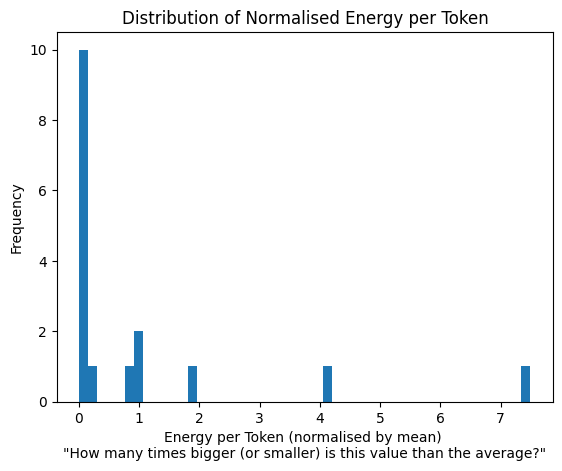

In [7]:
(df['energy_per_token_kwh'] / df['energy_per_token_kwh'].mean()).plot(
    kind='hist',
    bins=50,
    title='Distribution of Normalised Energy per Token',
    xlabel='Energy per Token (normalised by mean) \n"How many times bigger (or smaller) is this value than the average?"',
    ylabel='Frequency'
)

# Absolute Numbers

In [8]:
from scripts.f_scenario_analysis import compare_energy_to_appliances
compare_energy_to_appliances(df)

== ASSUMING AVERAGE LENGTH: 300 TOKENS ==
Models: ['Llama-3.2-1B', 'Llama-3.2-3B']

=== Model: Llama-3.2-1B ===
-- Scenario: Full config means (11 configs) --
Overall ratio (max/min): 360.32
# responses to match appliance (worst/best/diff/mean):
    iPhone_charge: worst 2.94, best 1057.94, diff 2.94, mean 18.09
    laptop_charge: worst 14.68, best 5289.71, diff 14.72, mean 90.45
    wifi_router_24h: worst 7.05, best 2539.06, diff 7.07, mean 43.41
    streaming_1hr: worst 14.68, best 5289.71, diff 14.72, mean 90.45
    google_search: worst 0.09, best 31.74, diff 0.09, mean 0.54
    kettle: worst 29.36, best 10579.41, diff 29.44, mean 180.90
    shower: worst 763.40, best 275064.72, diff 765.52, mean 4703.28

-- Scenario: Without outlier configs (11 configs) --
Overall ratio (max/min): 360.32
# responses to match appliance (worst/best/diff/mean):
    iPhone_charge: worst 2.94, best 1057.94, diff 2.94, mean 18.09
    laptop_charge: worst 14.68, best 5289.71, diff 14.72, mean 90.45
    wif

# Artifical vs realistic

In [9]:
from scripts.f_scenario_analysis import artificial_v_realistic
artificial_v_realistic(df)


--- Llama-3.2-1B (raw data) ---
Realistic mean   : 0.00085 kWh/resp
Artificial mean  : 0.00003 kWh/resp
- Abs diff (A−R) : -0.00082 kWh
- Ratio (R/A)    : 28.44×
- % reduction    : -2743.68%

--- Llama-3.2-1B (outliers removed (1.5×IQR)) ---
Realistic mean   : 0.00043 kWh/resp
Artificial mean  : 0.00003 kWh/resp
- Abs diff (A−R) : -0.00040 kWh
- Ratio (R/A)    : 14.22×
- % reduction    : -1322.12%

--- Llama-3.2-3B (raw data) ---
Realistic mean   : 0.00195 kWh/resp
Artificial mean  : 0.00002 kWh/resp
- Abs diff (A−R) : -0.00193 kWh
- Ratio (R/A)    : 92.62×
- % reduction    : -9162.37%

--- Llama-3.2-3B (outliers removed (1.5×IQR)) ---
Realistic mean   : 0.00056 kWh/resp
Artificial mean  : 0.00002 kWh/resp
- Abs diff (A−R) : -0.00054 kWh
- Ratio (R/A)    : 26.43×
- % reduction    : -2542.87%


# Within-realistic

In [10]:
from scripts.f_scenario_analysis import within_realistic
within_realistic(df)


*** Llama-3.2-1B (Realistic — raw data) ***
Worst (max): R7_anti_platonic_ideal @ 0.00341 kWh
Best  (min): R6_Medium_Scale_Language_Model_Serving @ 0.00004 kWh
- Abs diff  : 0.00337 kWh
- % reduction: 98.80%

*** Llama-3.2-1B (Realistic — outliers removed (1.5×IQR)) ***
Worst (max): R3_Balanced_Enterprise_Service @ 0.00079 kWh
Best  (min): R6_Medium_Scale_Language_Model_Serving @ 0.00004 kWh
- Abs diff  : 0.00075 kWh
- % reduction: 94.86%

*** Llama-3.2-3B (Realistic — raw data) ***
Worst (max): R7_anti_platonic_ideal @ 0.00614 kWh
Best  (min): R4_High_Load_Cloud_API_Deployment @ 0.00007 kWh
- Abs diff  : 0.00607 kWh
- % reduction: 98.82%

*** Llama-3.2-3B (Realistic — outliers removed (1.5×IQR)) ***
Worst (max): R3_Balanced_Enterprise_Service @ 0.00152 kWh
Best  (min): R4_High_Load_Cloud_API_Deployment @ 0.00007 kWh
- Abs diff  : 0.00145 kWh
- % reduction: 95.23%
